In [5]:
import os
print(os.getcwd())

/home/ria/Documents/YRP_iiit/Mac_Lea/molecular_property_prediction


In [6]:
os.chdir('/home/ria/Documents/YRP_iiit/Mac_Lea/molecular_property_prediction')
print(os.getcwd())

/home/ria/Documents/YRP_iiit/Mac_Lea/molecular_property_prediction


In [7]:
# Create a new notebook named 02_basic_model.ipynb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load processed data
df = pd.read_csv('processed_esol_data.csv')

# Define features and target
features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 
            'NumRotatableBonds', 'NumAromaticRings']
target = 'measured log solubility in mols per litre'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

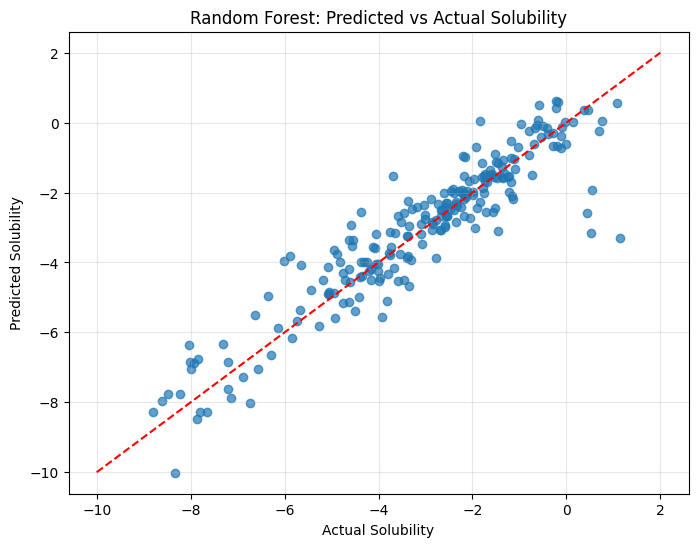

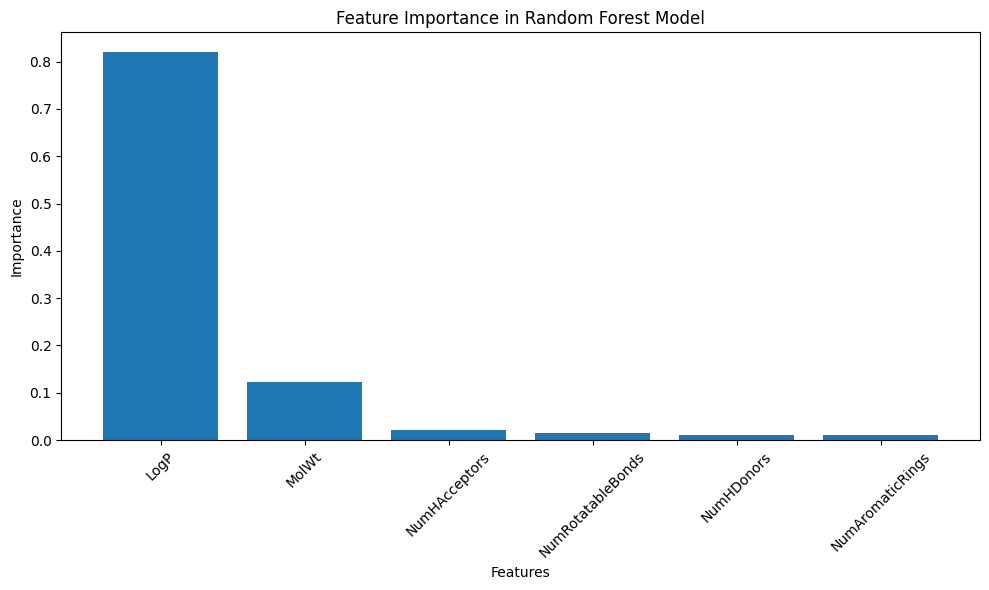

In [9]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([-10, 2], [-10, 2], 'r--')
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('Random Forest: Predicted vs Actual Solubility')
plt.grid(True, alpha=0.3)
plt.savefig('rf_predictions.png', dpi=300)
plt.show()

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

In [10]:
import joblib
rf_results = {
    'actual': y_test,
    'predicted': y_pred,
    'mse': mean_squared_error(y_test, y_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
    'r2': r2_score(y_test, y_pred)
}
joblib.dump(rf_results, 'random_forest_results.joblib')


['random_forest_results.joblib']